# Formula 1 Race Analysis

In [2]:
import os
folder= r"C:\Users\mathu\Downloads\Formula 1"
print(os.listdir(folder))

['circuits.csv', 'constructors.csv', 'constructor_results.csv', 'constructor_standings.csv', 'drivers.csv', 'driver_standings.csv', 'lap_times.csv', 'pit_stops.csv', 'qualifying.csv', 'races.csv', 'results.csv', 'seasons.csv', 'sprint_results.csv', 'status.csv']


In [4]:
import os
import pandas as pd

folder= r"C:\Users\mathu\Downloads\Formula 1"

circuits= pd.read_csv(folder + "/circuits.csv")
constructors= pd.read_csv(folder + "/constructors.csv")
constructor_results= pd.read_csv(folder + "/constructor_results.csv")
constructor_standings= pd.read_csv(folder + "/constructor_standings.csv")
drivers= pd.read_csv(folder + "/drivers.csv")
driver_standings= pd.read_csv(folder + "/driver_standings.csv")
lap_times= pd.read_csv(folder + "/lap_times.csv")
pit_stops= pd.read_csv(folder + "/pit_stops.csv")
qualifying= pd.read_csv(folder + "/qualifying.csv")
races= pd.read_csv(folder + "/races.csv")
results= pd.read_csv(folder + "/results.csv")
seasons= pd.read_csv(folder + "/seasons.csv")
sprint_results= pd.read_csv(folder + "/sprint_results.csv")
status= pd.read_csv(folder + "/status.csv")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning Function
def clean_data(df):
    df = df.drop_duplicates()
    df.columns = df.columns.str.strip()
    if 'alt' in df.columns:
        df['alt'] = df['alt'].fillna(df['alt'].median())
    return df

# Apply cleaning to all datasets
datasets = [df_drivers, df_driver_standings, df_constructors, df_constructor_standings, 
            df_constructor_results, df_qualifying, df_pit_stops, df_lap_times]
datasets = [clean_data(df) for df in datasets]

df_drivers, df_driver_standings, df_constructors, df_constructor_standings, \
df_constructor_results, df_qualifying, df_pit_stops, df_lap_times = datasets

# Basic Data Exploration
def explore_data(df, name):
    print(f"{name} Data Overview:\n")
    print(df.info())
    print("\nSummary Statistics:\n")
    print(df.describe())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\n" + "="*50 + "\n")

explore_data(df_drivers, "Drivers")

Drivers Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB
None

Summary Statistics:

         driverId
count  861.000000
mean   431.061556
std    248.793797
min      1.000000
25%    216.000000
50%    431.000000
75%    646.000000
max    862.000000

Missing Values:

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int

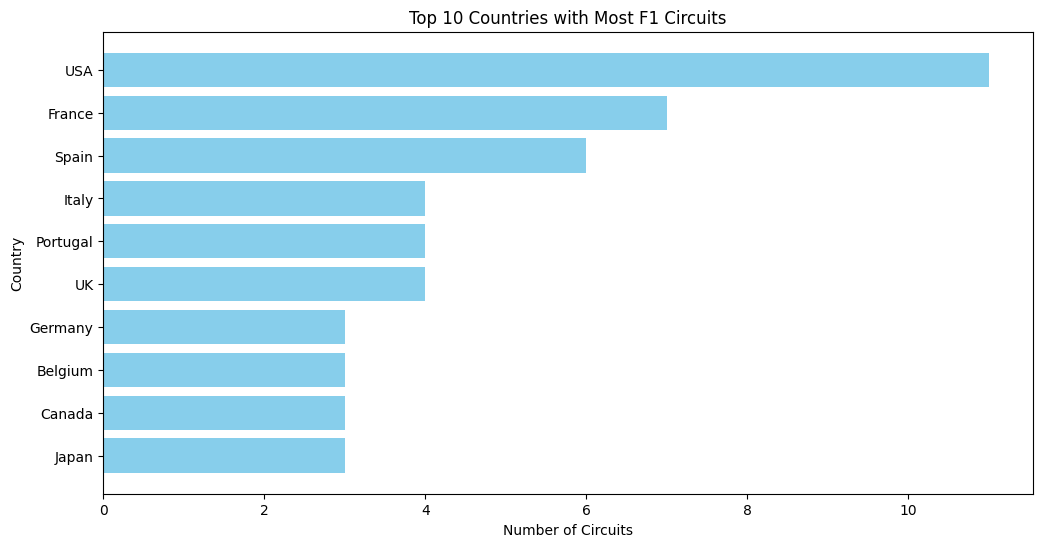

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Circuits by Country
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)  # Top 10 countries
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel("Number of Circuits")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most F1 Circuits")
plt.gca().invert_yaxis()
plt.show()




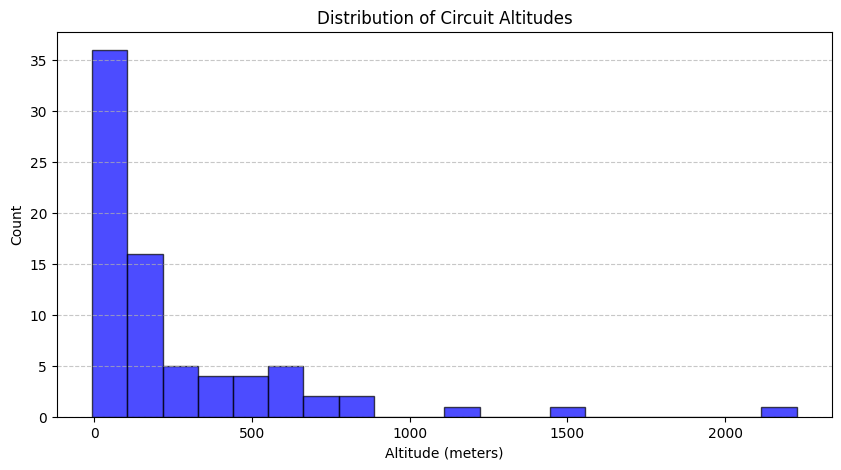

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Altitude Distribution
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df['alt'].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Altitude (meters)")
plt.ylabel("Count")
plt.title("Distribution of Circuit Altitudes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


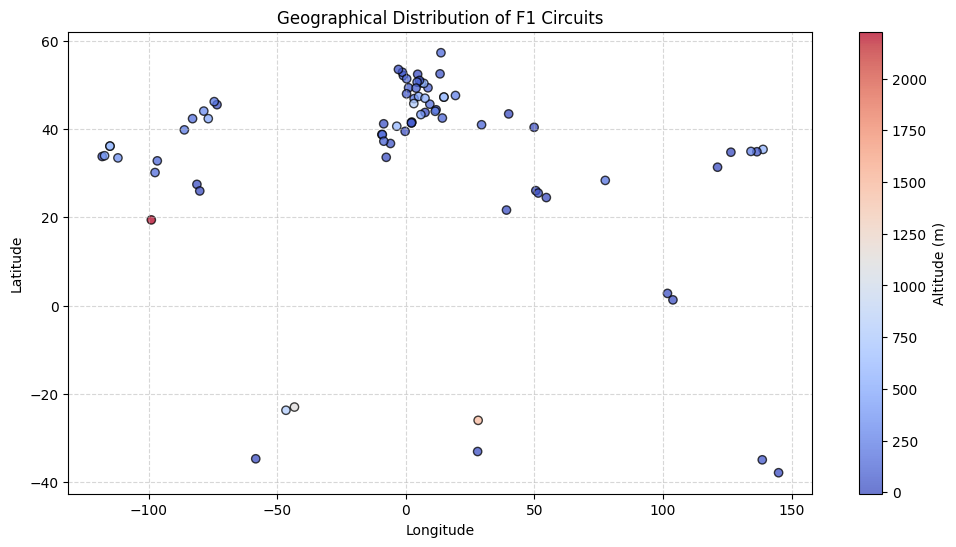

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Geographic Plot of Circuits
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['lng'], df['lat'], c=df['alt'], cmap='coolwarm', edgecolors='k', alpha=0.75)
plt.colorbar(scatter, label='Altitude (m)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of F1 Circuits")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

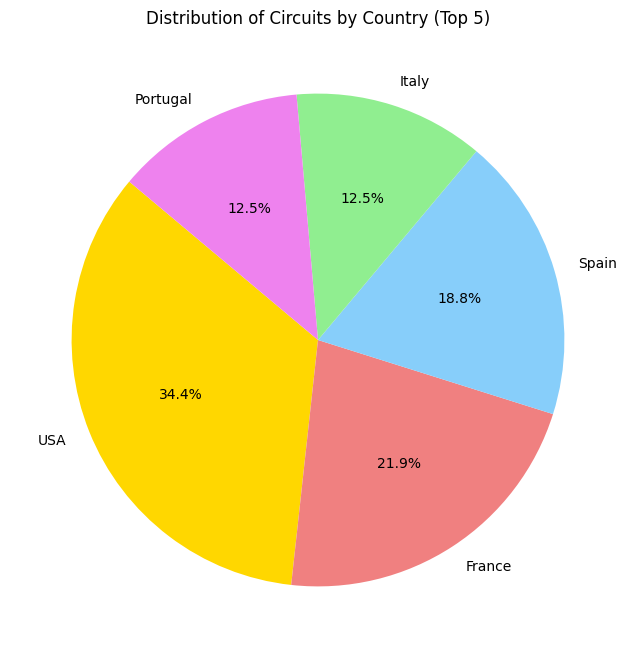

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pie Chart: Distribution of Circuits by Country (Top 5)
plt.figure(figsize=(8, 8))
top_countries = df['country'].value_counts().head(5)
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', colors=["gold", "lightcoral", "lightskyblue", "lightgreen", "violet"], startangle=140)
plt.title("Distribution of Circuits by Country (Top 5)")
plt.show()

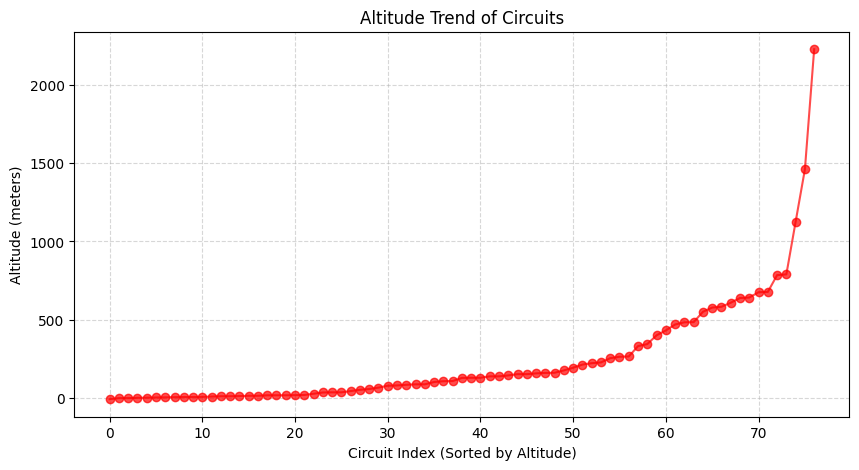

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Line Chart: Altitude Trend (Sorted by Altitude)
df_sorted = df.sort_values(by='alt')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['alt'].values, marker='o', linestyle='-', color='red', alpha=0.7)
plt.xlabel("Circuit Index (Sorted by Altitude)")
plt.ylabel("Altitude (meters)")
plt.title("Altitude Trend of Circuits")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Circuits of the F1 Race

In [4]:
import pandas as pd
folder= r"C:\Users\mathu\Downloads\Formula 1"

# reading
circuits= pd.read_csv(folder + "/circuits.csv")
print(circuits.head())


   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

# CIRCUITS
**Albert Park Grand Prix Circuit, Melbourne**
![Albert Park Grand Prix Circuit](https://th.bing.com/th/id/OIP.XyecHotnTJ8yvEAPd9JdTwHaEZ?rs=1&pid=ImgDetMain)


**Sepang International Circuit, Kuala Lumpur**
![Sepang International Circuit](https://th.bing.com/th/id/OIP.XyhlDBAuTjsRBjrau6RPYgHaF_?rs=1&pid=ImgDetMain)


**Bahrain International Circuit, Sakhir**
![Bahrain International Circuit](https://www.pointbh.com/wp-content/uploads/2015/03/Bahrain-International-Circuit-F1-1.jpg)


**Circuit de Barcelona-Cataluny, Montmeló**
![Circuit de Barcelona-Cataluny, Montmeló](https://i.redd.it/ygh3wlxilmg51.jpg)

**Istanbul Park, Istanbul**
![Istanbul Park, Istanbul](https://th.bing.com/th/id/OIP.RVCXj_lIIc9ZaNhUWsK6RwHaE8?rs=1&pid=ImgDetMain)

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


folder= r"C:\Users\mathu\Downloads\Formula 1"

circuits_df = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\circuits.csv")
seasons_df = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\seasons.csv")
status_df = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\status.csv")
sprint_results_df = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\sprint_results.csv")
results_df = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\results.csv")

In [11]:
# Data Cleaning
# Removing duplicates
dfs = [circuits_df, seasons_df, status_df, sprint_results_df, results_df]
for df in dfs:
    df.drop_duplicates(inplace=True)

# Handling missing values
results_df.fillna({'points': 0, 'positionOrder': results_df['positionOrder'].median()}, inplace=True)
sprint_results_df.fillna({'points': 0}, inplace=True)

# Exploratory Data Analysis (EDA)
print("Circuits Dataset Overview:\n")
print(circuits_df.info())
print("\nSeasons Dataset Overview:\n")
print(seasons_df.info())
print("\nStatus Dataset Overview:\n")
print(status_df.info())
print("\nSprint Results Dataset Overview:\n")
print(sprint_results_df.info())
print("\nResults Dataset Overview:\n")
print(results_df.info())

Circuits Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB
None

Seasons Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    75 non-null     int64 
 1   url     75 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None

Status Dataset Overvie

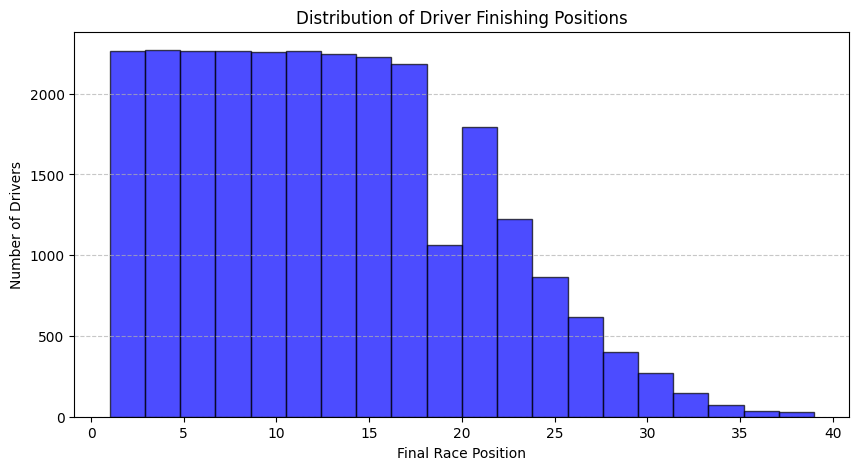

In [12]:
# 1. Race Results Distribution (Histogram)
plt.figure(figsize=(10, 5))
plt.hist(results_df['positionOrder'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Final Race Position")
plt.ylabel("Number of Drivers")
plt.title("Distribution of Driver Finishing Positions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_drivers = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\drivers.csv")
df_driver_standings = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\driver_standings.csv")
df_constructors = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\constructors.csv")
df_constructor_standings = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\driver_standings.csv")
df_constructor_results = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\constructor_results.csv")
df_qualifying = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\qualifying.csv")
df_pit_stops = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\pit_stops.csv")
df_lap_times = pd.read_csv(r"C:\Users\mathu\Downloads\Formula 1\lap_times.csv")



In [3]:
# Preview datasets
print("Drivers Data:")
print(df_drivers.head())

print("\nDriver Standings Data:")
print(df_driver_standings.head())

# Example Analysis: Top drivers by points
merged_df = df_driver_standings.merge(df_drivers, on='driverId')
top_drivers = merged_df.groupby(['surname'])['points'].sum().sort_values(ascending=False).head(10)


Drivers Data:
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  

Driver Standings Data:
   driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1       

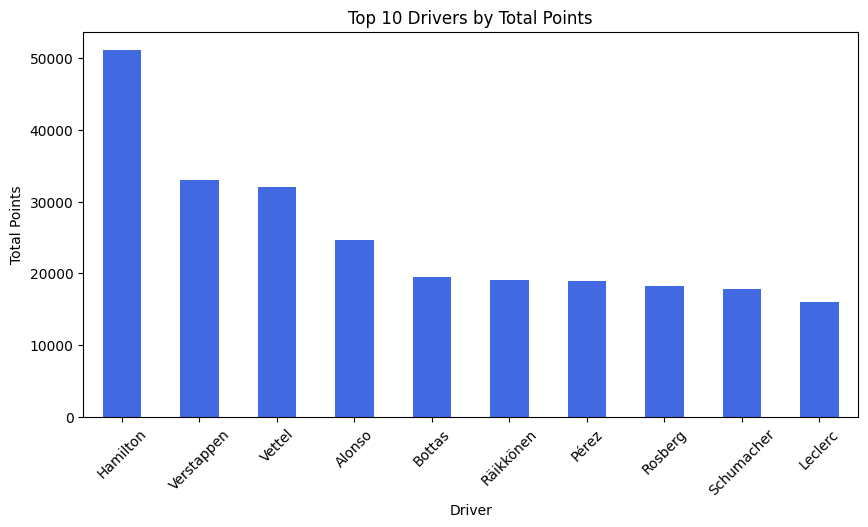

In [7]:
# Plot top drivers
plt.figure(figsize=(10,5))
top_drivers.plot(kind='bar', color='royalblue')
plt.xlabel("Driver")
plt.ylabel("Total Points")
plt.title("Top 10 Drivers by Total Points")
plt.xticks(rotation=45)
plt.show()